In [4]:
import json
import math
#import bigfloat
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

#import matplotlib
#from numpy.random import randn
#import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

%matplotlib inline

ImportError: No module named seaborn

In [3]:
import sys
print(sys.path)

['', '/home/j3ny/anaconda/lib/python27.zip', '/home/j3ny/anaconda/lib/python2.7', '/home/j3ny/anaconda/lib/python2.7/plat-linux2', '/home/j3ny/anaconda/lib/python2.7/lib-tk', '/home/j3ny/anaconda/lib/python2.7/lib-old', '/home/j3ny/anaconda/lib/python2.7/lib-dynload', '/home/j3ny/anaconda/lib/python2.7/site-packages', '/home/j3ny/anaconda/lib/python2.7/site-packages/Sphinx-1.3.1-py2.7.egg', '/home/j3ny/anaconda/lib/python2.7/site-packages/cryptography-0.9.1-py2.7-linux-x86_64.egg', '/home/j3ny/anaconda/lib/python2.7/site-packages/setuptools-17.1.1-py2.7.egg', '/home/j3ny/anaconda/lib/python2.7/site-packages/IPython/extensions']


In [3]:
def read_data(filename, short=False):
    json_data = open(filename, 'r').read()
    raw_data = json.loads(json_data)
    seq = []
    seq_id = []
    energy = []
    for k1, v1 in raw_data.iteritems():
        if k1 == "name":
            continue
        stp_i = int(k1)
        staple = v1
        #print str(stp_i) + ' ' + v1['staple_sequence']
        for k2, v2 in staple.iteritems():
            if not k2.isdigit():
                continue
            arm_i = k2
            arm = v2
            if short and len(arm['sequence']) > 8:
                continue
            dG = arm['dG']
            min_dG = float(arm['min_dG'])
            seq.append(arm['sequence'])
            seq_id.append('stp_' + str(stp_i) + '_' + str(arm_i))
            local_min = []
            for i in range(len(dG)-1):
                if dG[i] < dG[i-1] and dG[i] <= dG[i+1]:
                    local_min.append(float(dG[i]))
            sorted_by_energy = sorted(local_min)
            energy.append(numpy.array(sorted_by_energy))
    return seq_id, seq, energy

In [4]:
def get_boltzmann_distribution(energy_by_arm):
    R = 8.3144621  # gas constant
    T = 293.15  # room temperature
    factor = 4184.0  # joules_per_kcal
    boltzmann_distribution = []
    for dG in energy_by_arm:
        ps = []
        total = bigfloat.BigFloat(0)
        for energy in dG:
            p = bigfloat.exp((-energy*factor)/(R*T), bigfloat.precision(1000))
            ps.append(p)
            total = bigfloat.add(total, p)
        normal_ps = []
        for p in ps:
            normal_ps.append(float(bigfloat.div(p,total)))
        boltzmann_distribution.append(numpy.array(normal_ps))
    return boltzmann_distribution
    
PATH = '/home/j3ny/repos/analysis/Analysis/thermodynamic_addressability/'
#filename = "DeBruijn_specific_hist.png"

def plot(data, output_file):
	sns.set(style="white", palette="muted")
	f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
	sns.despine(left=True)
	b, g, r = sns.color_palette("muted", 3)
	for i, dist in enumerate(data):
		specific = [p[0] for p in dist]
		unspecific = [sum(p[1:]) for p in dist]
		#sns.distplot(specific, kde=False, color=b, ax=axes[0])
		#sns.distplot(specific, hist=False, rug=True, color=r, ax=axes[0, 1])
		#sns.distplot(specific, hist=False, color=g, kde_kws={"shade": True}, ax=axes[1, 0])
		sns.distplot(specific, color=g, ax=axes[i,1])
		sns.distplot(unspecific, color=r, ax=axes[i,0])
	plt.setp(axes, yticks=[])
	plt.tight_layout()
	plt.savefig(PATH + output_file,format='png',dpi=600)

In [5]:
path = 'data/'
filename_DB = 'DeBruijn_alpha.json'
filename_pUC19 = 'pUC19_alpha.json'
filename_M13 = 'M13_square.json'

#ids, sequences, energies
_, _, energies_DB = read_data(path + filename_DB)
_, _, energies_pUC19 = read_data(path + filename_pUC19)
_, _, energies_M13 = read_data(path + filename_M13)

_, _, energies_DB_short = read_data(path + filename_DB, short=True)
_, _, energies_pUC19_short = read_data(path + filename_pUC19, short=True)
_, _, energies_M13_short = read_data(path + filename_M13, short=True)

dist_DB = get_boltzmann_distribution(energies_DB)
dist_PUC = get_boltzmann_distribution(energies_pUC19)
dist_M13 = get_boltzmann_distribution(energies_M13)

dist_DB_short = get_boltzmann_distribution(energies_DB_short)
dist_PUC_short = get_boltzmann_distribution(energies_pUC19_short)
dist_M13_short = get_boltzmann_distribution(energies_M13_short)

In [21]:
def normalise(dist):
    num_bins = 20
    hist = [0] * num_bins
    for d in dist:
        hist[int(d*num_bins)] += 1
    normalised = [1.0*count/len(dist) for count in hist]
    return normalised

In [56]:
dist = [d[0] for d in dist_DB_short]
normalised_dist = normalise(dist)
print normalised_dist

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.10204081632653061, 0.01020408163265306, 0.10204081632653061, 0.15306122448979592, 0.16326530612244897, 0.25510204081632654, 0.1326530612244898]


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.10204081632653061, 0.01020408163265306, 0.10204081632653061, 0.15306122448979592, 0.16326530612244897, 0.25510204081632654, 0.1326530612244898]


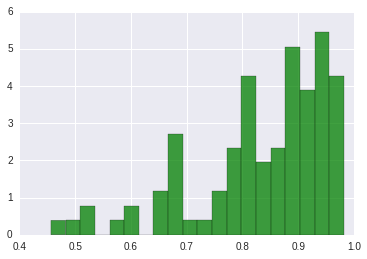

In [27]:
dist = [d[0] for d in dist_DB_short]

def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(int(y))

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] == True:
        return s + r'$\%$'
    else:
        return s + '%'

num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(dist, num_bins, normed=1, facecolor='green', alpha=0.75)

#formatter = FuncFormatter(to_percent)
#plt.gca().yaxis.set_major_formatter(formatter)

#plt.plot(bins)
#plt.xlabel('Probability')
#plt.ylabel('Fraction of staples')
#plt.title(r'De Bruijn: histogram of specific staple hybridistaion')

# Make a normed histogram. It'll be multiplied by 100 later.
#plt.hist(x, bins=10, normed=False)
#plt.xlim(0,1)

# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
#formatter = FuncFormatter(to_percent)

# Set the formatter
#plt.gca().yaxis.set_major_formatter(formatter)
#plt.ylim(0, 100)

PATH = '/home/j3ny/repos/analysis/Analysis/thermodynamic_addressability/output/'
output_file = 'DeBruijn.png'

#plt.show()
#plt.savefig(PATH + output_file,format='png',dpi=600)

